In [2]:
%run "libraries.ipynb"

from IPython.display import display, HTML
from IPython.html import widgets
import matplotlib.patheffects as path_effects

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
hyperlinks_graph = nx.read_gexf("data/hyperlinks.gexf")

In [4]:
g = nx.DiGraph()

nb_out = 3

hyperlinks_graph.remove_nodes_from([ "Geometry", "Mathematics" ])

for u in hyperlinks_graph:
    nb = sorted(hyperlinks_graph[u].items(), key=lambda x: -x[1]["term occurence"])
    
    # filtering self loops
    nb = [ n for n in nb if n[0] != u ]

    for v in nb[0:nb_out]:
        #print v
        g.add_edge(u, v[0], attr_dict=v[1])

In [5]:
print "reduced graph"
print "============="
print "nodes: %s" % (len(g.nodes()))
print "edges: %s" % (len(g.edges()))
print "reduction: %s/%s (%s)" % (len(g.edges()),
                                 len(hyperlinks_graph.edges()),
                                 float(len(g.edges()))/float(len(hyperlinks_graph.edges())))

reduced graph
nodes: 296
edges: 838
reduction: 838/3469 (0.241568175267)


In [6]:
nx.write_gexf(g, "data/reading_maps/pages-hyperlinks-reduced-3.gexf")

## community detection

In [7]:
import community
partitions = community.best_partition(g.to_undirected())

In [8]:
def print_groups(communities):
    html = "<table>"

    for c, ps in communities.iteritems():
        html += "<tr><td style=\"width: 100px; text-align: center; \"><h3>group %s</h3></td><td>" % (c)
        html += ", ".join(map(lambda x: u"<a href=\"http://en.wikipedia.org/wiki/{0}\" target=\"_blank\">{0}</a>".format(x), ps))
        html += "</td></tr>"
    
    html += "</table>"

    display(HTML(html))
        
communities = {}
for k, v in partitions.iteritems():
    communities.setdefault(v, []).append(k)


print_groups(communities)

## subgraphs explorer

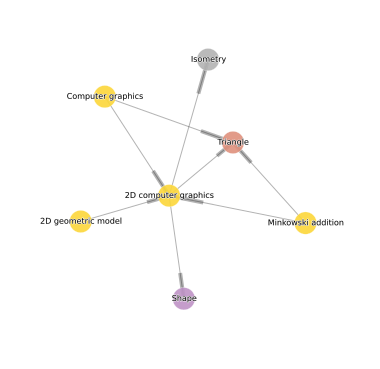

In [9]:
%config InlineBackend.figure_formats=['svg']

def map_colors(g ,partitions):
    size = np.max( [ x[1] for x in partitions.iteritems() ])
    
    for n in partitions:
        g.node[n]["color"] = float(partitions[n])/float(size)


map_colors(g, partitions)

pages = g.nodes()
pages = sorted(pages)

color_map = plt.get_cmap("Set2")
# color_map = sns.color_palette("Set2", 11)

print color_map
def display_local_graph(page):
    nbunch = [ page ]
    nbunch.extend( list(g.to_undirected()[page]))
    g_sub = g.subgraph(nbunch)

    #nx.draw_spring(g2)
    pos = nx.spring_layout(g_sub,iterations=150)
   
    plt.figure(figsize=(6,6))

    colors = map(lambda x: g.node[x]["color"], g_sub.nodes())
    
    # draw nodes
    nodes = nx.draw_networkx_nodes(g_sub, pos, alpha=0.9, node_size=500, node_color=colors, cmap=color_map, vmin=0, vmax=1)
    nodes.set_edgecolor('w')

    # draw edges
    nx.draw_networkx_edges(g_sub, pos, alpha=0.3, width=1)
    
    # draw labels
    labels = nx.draw_networkx_labels(g_sub, pos, font_size=8, font_family="Bitstream Vera Sans")
    map(lambda x: labels[x].set_path_effects([path_effects.Stroke(linewidth=1, foreground='white'),
                       path_effects.Normal()]),labels)
    
    plt.axis('off')
    plt.show()


w = widgets.Select(description="page", options=pages)
widgets.interact(display_local_graph, page=w);